# Introduction to `explainy`
In this notebook, we will go over the main functionalities of the library

In [ ]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

Error: Session cannot generate requests

`explainy` allows you to create machine learning model explanations based on four different explanation characteristics:

-   **global**: explanation of system functionality
-   **local**: explanation of decision rationale
-   **contrastive**: tracing of decision path
-   **non-contrastive**: parameter weighting

The explanations algorithms in `explainy` can be categorized as follows:
| | non-contrastive				|contrastive | 
| --- 			| --- 				| --- | 
|global|Permutation Feature Importance	| Surrogate Model | 
|local|Shap Values	| Counterfactual Example|


In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

diabetes = load_diabetes()

X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, random_state=0
)
X_test = pd.DataFrame(X_test, columns=diabetes.feature_names)
y_test = pd.DataFrame(y_test)

model = RandomForestRegressor(random_state=0).fit(X_train, y_train)

The RandomForestRegressor used 10 features to produce the predictions. The prediction of this sample was 251.8.
The feature importance was calculated using the Permutation Feature Importance method.
The four features which were most important for the predictions were (from highest to lowest): 'bmi' (0.15), 's5' (0.12), 'bp' (0.03), and 'age' (0.02).


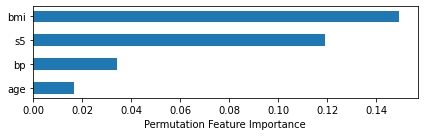

In [ ]:
from explainy.explanations.permutation_explanation import PermutationExplanation

number_of_features = 4
sample_index = 1

explainer = PermutationExplanation(X_test, y_test, model, number_of_features)

explanation = explainer.explain(sample_index)
print(explanation)
explainer.plot(kind='bar')

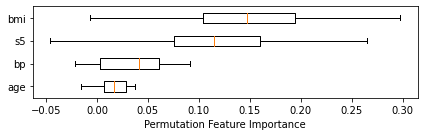

In [ ]:
explainer.plot(kind='box')

Generate explanations with multiple numbers of features to explain the outcoume.
Since the `PermuationExplanation` method is a global explaination method, all samples will have the same feature importance explanation.

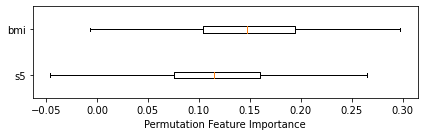

The RandomForestRegressor used 10 features to produce the predictions. The prediction of this sample was 250.6.
The feature importance was calculated using the Permutation Feature Importance method.
The two features which were most important for the predictions were (from highest to lowest): 'bmi' (0.15), and 's5' (0.12).




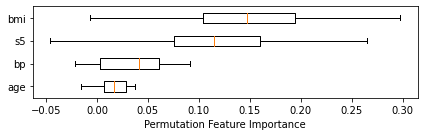

The RandomForestRegressor used 10 features to produce the predictions. The prediction of this sample was 250.6.
The feature importance was calculated using the Permutation Feature Importance method.
The four features which were most important for the predictions were (from highest to lowest): 'bmi' (0.15), 's5' (0.12), 'bp' (0.03), and 'age' (0.02).




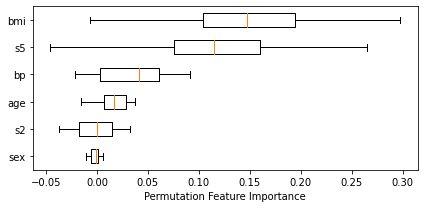

The RandomForestRegressor used 10 features to produce the predictions. The prediction of this sample was 250.6.
The feature importance was calculated using the Permutation Feature Importance method.
The six features which were most important for the predictions were (from highest to lowest): 'bmi' (0.15), 's5' (0.12), 'bp' (0.03), 'age' (0.02), 's2' (-0.00), and 'sex' (-0.00).




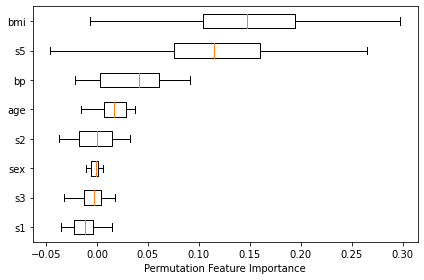

The RandomForestRegressor used 10 features to produce the predictions. The prediction of this sample was 250.6.
The feature importance was calculated using the Permutation Feature Importance method.
The eight features which were most important for the predictions were (from highest to lowest): 'bmi' (0.15), 's5' (0.12), 'bp' (0.03), 'age' (0.02), 's2' (-0.00), 'sex' (-0.00), 's3' (-0.00), and 's1' (-0.01).




In [ ]:
# Global, Non-contrastive
samples = [0]
list_number_of_features = [2, 4, 6, 8, 10]

sample_index = 0
for number_of_features in [2, 4, 6, 8]:
    explainer = PermutationExplanation(
        X_test, y_test, model, number_of_features
    )
    explanation = explainer.explain(sample_index)
    explainer.plot(kind='box')
    print(explanation)
    print('\n')

Let's use the `ShapExplanation` to create local explantions for each sample individually.

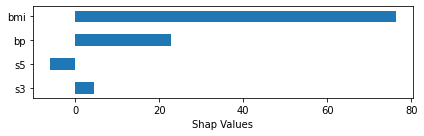

The RandomForestRegressor used 10 features to produce the predictions. The prediction of this sample was 250.6.
The feature importance was calculated using the SHAP method.
The four features which were most important for this particular sample were (from highest to lowest): 'bmi' (76.27), 'bp' (22.80), 's5' (-5.95), and 's3' (4.48).




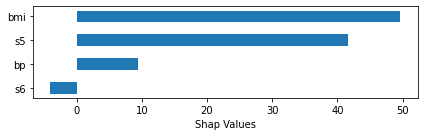

The RandomForestRegressor used 10 features to produce the predictions. The prediction of this sample was 251.8.
The feature importance was calculated using the SHAP method.
The four features which were most important for this particular sample were (from highest to lowest): 'bmi' (49.63), 's5' (41.66), 'bp' (9.40), and 's6' (-4.04).




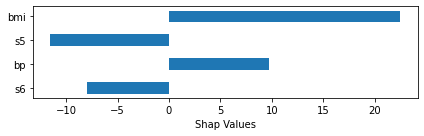

The RandomForestRegressor used 10 features to produce the predictions. The prediction of this sample was 169.2.
The feature importance was calculated using the SHAP method.
The four features which were most important for this particular sample were (from highest to lowest): 'bmi' (22.48), 's5' (-11.53), 'bp' (9.70), and 's6' (-7.94).




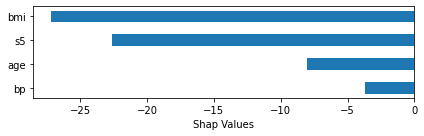

The RandomForestRegressor used 10 features to produce the predictions. The prediction of this sample was 93.7.
The feature importance was calculated using the SHAP method.
The four features which were most important for this particular sample were (from highest to lowest): 'bmi' (-27.17), 's5' (-22.63), 'age' (-8.00), and 'bp' (-3.70).




In [ ]:
from explainy.explanations.shap_explanation import ShapExplanation

# Local, Non-contrastive
number_of_features = 4
for sample_index in [0, 1, 2, 3]:

    explainer = ShapExplanation(
        X_test, y_test, model, number_of_features
    )
    explanation = explainer.explain(sample_index)
    explainer.plot(sample_index)
    print(explanation)
    print('\n')


In [ ]:
from explainy.explanations.surrogate_model_explanation import SurrogateModelExplanation

# Global, Contrastive
list_number_of_features = [2, 4]
for number_of_features in list_number_of_features:
    for sample_index in [0]:

        explainer = SurrogateModelExplanation(
            X_test, y_test, model, number_of_features
        )
        explanation = explainer.explain(sample_index)
        explainer.plot(sample_index)
        print(explanation)
        print('\n')


2021-09-30 21:53:20,072: INFO: Surrogate Model R2 score: 0.53


In [ ]:
from explainy.explanations.counterfactual_explanation import CounterfactualExplanation

# Local, Contrastive
number_of_features = 6
for number_of_features in list_number_of_features:
    for sample_index in [1, 2, 3]:
        explainer = CounterfactualExplanation(
            X_test, y_test, model, number_of_features
        )
        explanation = explainer.explain(sample_index)
        explainer.plot(sample_index)
        print(explanation)
        print('\n')


Error: Session cannot generate requests

Finally, we can also compare the explanations using the four different algorithms:

In [ ]:
number_of_features = 4
sample_index = 1

for ExplanationObject in [PermutationExplanation, SurrogateModelExplanation, ShapExplanation, CounterfactualExplanation]:
    explainer = ExplanationObject(
        X_test, y_test, model, number_of_features
    )
    explanation = explainer.explain(sample_index)
    explainer.plot(sample_index)
    print(explanation)
    print('\n')